# Lab | Inferential statistics - T-test & P-value
## Instructions
1. We will have another simple example on two sample t test (pooled- when the variances are equal). But this time this is a one sided t-test.

    In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file `files_for_lab/machine.txt`. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other.


2. An additional problem (not mandatory): In this case we can't assume that the population variances are equal. Hence in this case we cannot pool the variances. Independent random samples of 17 sophomores and 13 juniors attending a large university yield the following data on grade point averages. Data is provided in the file `files_for_lab/student_gpa.txt`. At the 5% significance level, do the data provide sufficient evidence to conclude that the mean GPAs of sophomores and juniors at the university differ?

    Test statistics can be calculated as: link to the image - Test statistics calculation for Unpooled Variance Case

    Degrees of freedom is (n1-1)+(n2-1).

In [13]:
import numpy as np
import pandas as pd

from scipy.stats import t
import math

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing the data.
data = pd.read_csv('/Users/pauli/Desktop/Ironhack/Week17/Jueves/lab-t-tests-p-values/files_for_lab/machine.txt', encoding='utf-16', sep='\t')
data

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


#### Hypothesis

    m2 = average speed of New machine
    m1 = average speed of Old machine

    H0: m2 = m1 (The two machines are performing the same)
    H1: m2 > m1 (The New machine will pack faster on the average than the Old machine)

    We choose a significance level of alpha = 0.05
    This is a right-tailed test.

#### Two-sample t-test assumptions

To conduct a valid test:

* **Data values must be independent.** Measurements for one observation do not affect measurements for any other observation. --> There is no connection between the two machines, so this is true*
* **Data in each group must be obtained via a random sample from the population.** --> We'll assume this is true
* **Data in each group are normally distributed.** --> The values can be plotted for the two samples
* **Data values are continuous.** --> This is the case because time is measured in seconds
* **The variances for the two independent groups are equal.** --> The two samples have similar variances

In [3]:
# Checking the columns.
data.columns

Index(['New machine', '    Old machine'], dtype='object')

In [4]:
# Renaming the name of the Old machine column.
data.rename(columns={'    Old machine': 'old_machine'}, inplace=True)
data.rename(columns={'New machine': 'new_machine'}, inplace=True)

In [7]:
m1 = round(data['old_machine'].mean(), 2)
m2 = round(data['new_machine'].mean(), 2)

std1 = round(data['old_machine'].std(), 2)
std2 = round(data['new_machine'].std(), 2)

n1 = 10    # Number of samples
n2 = 10    # Number of samples

degree = (n1-1)+(n2-1)

print('Old machine :', '   mean =', m1, '   standard deviation =', std1, '   samples =', n1)
print('New machine :', '   mean =', m2, '   standard deviation =', std2, '   samples =', n2)

Old machine :    mean = 43.23    standard deviation = 0.75    samples = 10
New machine :    mean = 42.14    standard deviation = 0.68    samples = 10


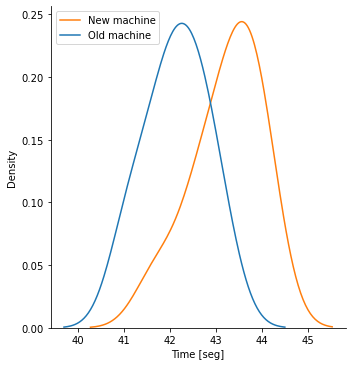

In [11]:
# Checking the data
sns.displot([data['new_machine'], data['old_machine']], kind='kde', legend=False)
plt.legend(["New machine", "Old machine"])
plt.xlabel("Time [seg]")
plt.show()

**We see that the values are normally distributed in the two datasets.**

In [33]:
# Calculate the t-value:
diff_means = m2 - m1
standard_error_for_the_mean = math.sqrt((std1/n1)+(std2/n2))
t = round((diff_means / standard_error_for_the_mean), 3)
print(t)

-2.882


In [35]:
pooled_sample_std = math.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2)/(n1+n2-2))
statistic = (m2-m1)/(pooled_sample_std*math.sqrt((1/n1)+(1/n2)))
print("T Statistic is: ", statistic)

T Statistic is:  -3.4047540987884606


In [36]:
from scipy.stats import t

# Using python to find the p value and critical value
print("P value is: ", 1- t.cdf(statistic,n1+n2-2))
print("Critical Value of z is: ", t.ppf(0.05, n1+n2-2)) #alpha is 0.05

P value is:  0.9984209598073223
Critical Value of z is:  -1.734063606617536


In [37]:
from scipy.stats import t
if (1- t.cdf(statistic,n1+n2-2)) > 0.05:
    print("Therefore we faild to reject the null hypothesis Ho")

Therefore we faild to reject the null hypothesis Ho
